<a href="https://colab.research.google.com/github/louis-sanna-eki/AdventOfCode2021/blob/main/notebooks/macron_dette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup



In [1]:
from google.colab import drive
drive.mount('/content/drive')
FILE_PATH = "/content/drive/MyDrive/lr-data/livre-noir/dette.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# France

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to format the y-axis as percentage
def percentage_formatter(x, pos):
    return f'{x}%'

# Read the Excel file
all_sheets_dict = pd.read_excel(FILE_PATH, sheet_name=None)

# Clean the data for 'Evolution France' sheet
sheet_evolution_france = all_sheets_dict['Evolution France']
relevant_data = sheet_evolution_france.iloc[:, :3]
relevant_data = relevant_data.drop(relevant_data.index[0])  # Drop the header description
relevant_data.columns = ['Trimestre', 'Dette en Milliards d\'Euros', 'Dette en % du PIB']  # Rename columns
relevant_data.reset_index(drop=True, inplace=True)

# Convert columns to numeric values for plotting
relevant_data['Dette en Milliards d\'Euros'] = pd.to_numeric(relevant_data['Dette en Milliards d\'Euros'], errors='coerce')
relevant_data['Dette en % du PIB'] = pd.to_numeric(relevant_data['Dette en % du PIB'], errors='coerce')

# Setting the style to 'fivethirtyeight' for matplotlib
plt.style.use('fivethirtyeight')



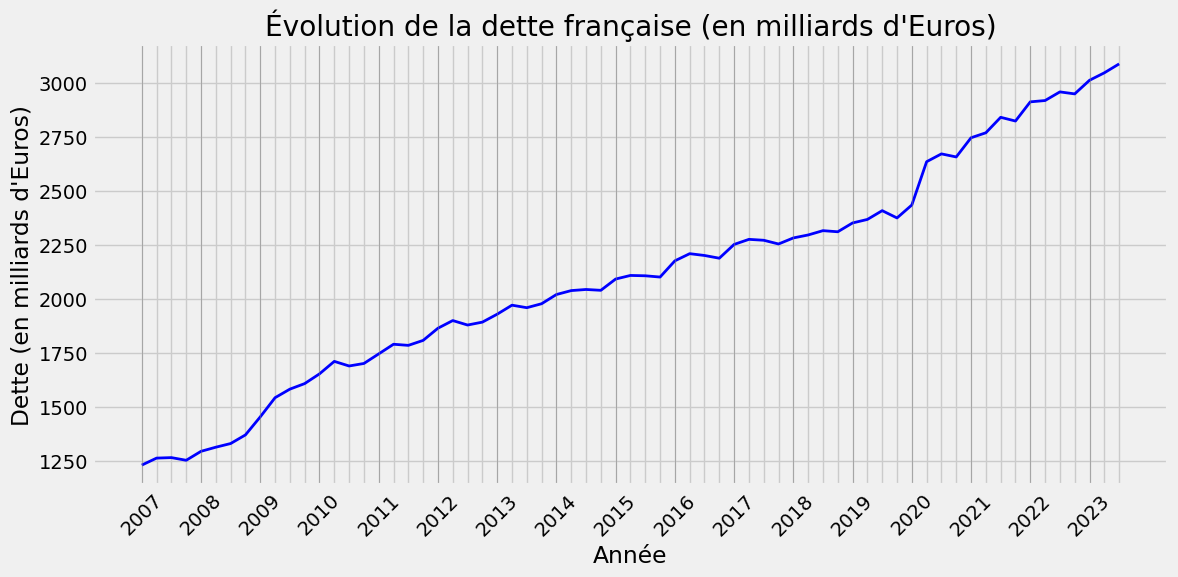

In [3]:
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis as billions
def billion_formatter(x, pos):
    value = f'{x / 1:.0f}'
    return value

# Function to format the x-axis, showing only the year for the first quarter
def custom_quarter_formatter(x, pos):
    year, quarter = x.split('-')
    if quarter == 'T1':
        return year
    return ""


# Plotting the evolution of the French debt in billions of euros
plt.figure(figsize=(12, 6))
plt.plot(relevant_data['Trimestre'], relevant_data['Dette en Milliards d\'Euros'], color='blue', linewidth=2)
plt.gca().yaxis.set_major_formatter(FuncFormatter(billion_formatter))
# Custom formatting for the x-axis
xticklabels = [custom_quarter_formatter(x, pos) for pos, x in enumerate(relevant_data['Trimestre'])]
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, rotation=45)

# Custom gridlines for Q2, Q3, Q4
for i, trimestre in enumerate(relevant_data['Trimestre']):
    if '-T1' in trimestre:
        plt.axvline(x=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.7)

plt.xlabel('Année')
plt.ylabel('Dette (en milliards d\'Euros)')
plt.title('Évolution de la dette française (en milliards d\'Euros)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

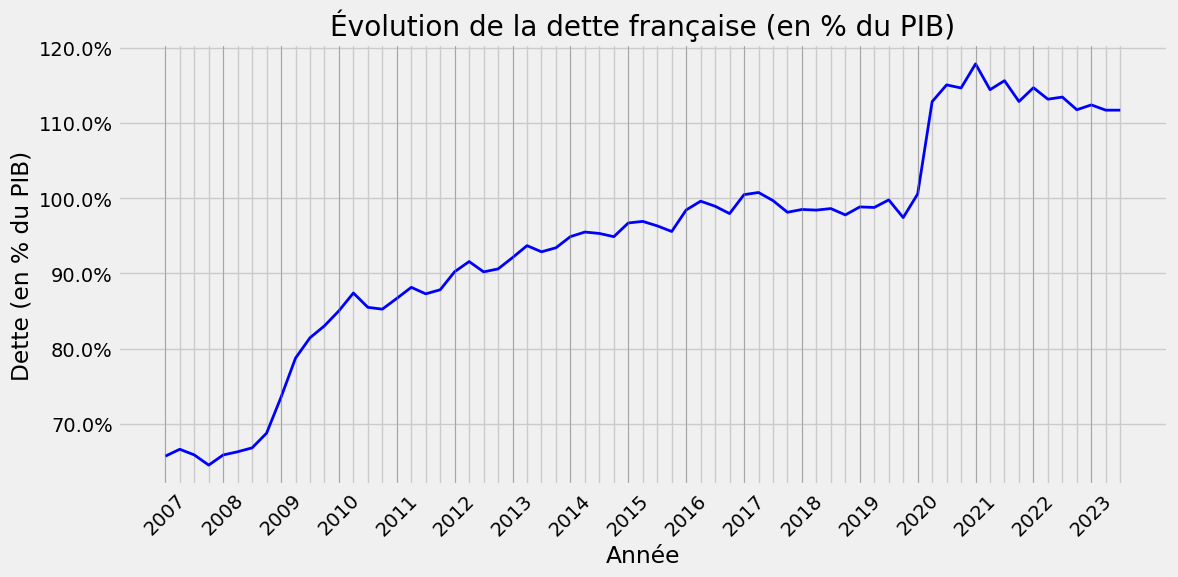

In [4]:
# Function to format the x-axis, showing only the year for the first quarter
def custom_quarter_formatter(x, pos):
    year, quarter = x.split('-')
    if quarter == 'T1':
        return year
    return ""


# Plotting the evolution of the French debt as a percentage of the GDP
plt.figure(figsize=(12, 6))
plt.plot(relevant_data['Trimestre'], relevant_data['Dette en % du PIB'], color='blue', linewidth=2)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

xticklabels = [custom_quarter_formatter(x, pos) for pos, x in enumerate(relevant_data['Trimestre'])]
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, rotation=45)

# Custom gridlines for Q2, Q3, Q4
for i, trimestre in enumerate(relevant_data['Trimestre']):
    if '-T1' in trimestre:
        plt.axvline(x=i, color='grey', linestyle='-', linewidth=0.5, alpha=0.7)

plt.xlabel('Année')
plt.ylabel('Dette (en % du PIB)')
plt.title('Évolution de la dette française (en % du PIB)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

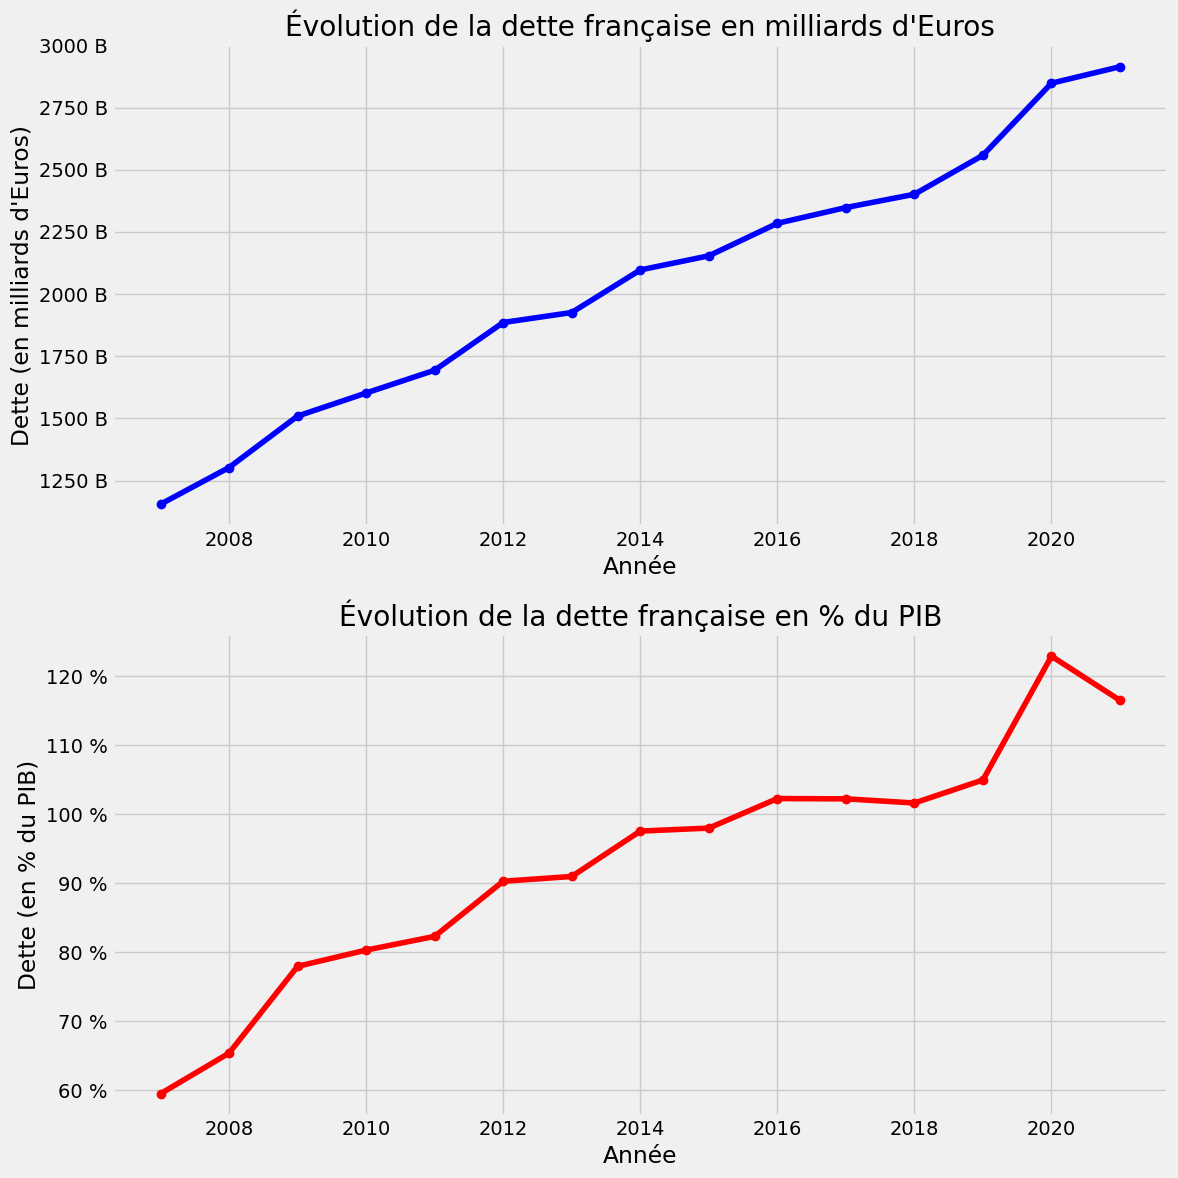

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Raw data provided in the user's image
data = {
    "Année": ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    "En % du PIB": [59.49, 65.37, 77.95, 80.30, 82.29, 90.28, 90.97, 97.55, 97.98, 102.26, 102.22, 101.62, 104.96, 122.89, 116.49],
    "En VA": [1154.87, 1302.47, 1509.40, 1602.24, 1693.88, 1885.77, 1925.98, 2097.19, 2154.03, 2284.67, 2348.13, 2401.64, 2558.57, 2848.40, 2914.69]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Converting 'Année' to integers for plotting purposes
df['Année'] = df['Année'].astype(int)

# Setting the style to 'fivethirtyeight' for matplotlib
plt.style.use('fivethirtyeight')

# Function to format the y-axis as billions
def billion_formatter(x, pos):
    return f'{x / 1:.0f} B'

# Function to format the y-axis as percentage
def percentage_formatter(x, pos):
    return f'{x:.0f} %'

# Separate the plots into two charts for clarity

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plotting 'En VA' (Debt in Billions) in the first subplot
ax1.plot(df['Année'], df['En VA'], 'b-o', label='Dette en Milliards d\'Euros')
ax1.set_xlabel('Année')
ax1.set_ylabel('Dette (en milliards d\'Euros)')
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(FuncFormatter(billion_formatter))
ax1.set_title('Évolution de la dette française en milliards d\'Euros')

# Plotting 'En % du PIB' (Debt as % of GDP) in the second subplot
ax2.plot(df['Année'], df['En % du PIB'], 'r-o', label='Dette en % du PIB')
ax2.set_xlabel('Année')
ax2.set_ylabel('Dette (en % du PIB)')
ax2.tick_params(axis='y')
ax2.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax2.set_title('Évolution de la dette française en % du PIB')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Comparison

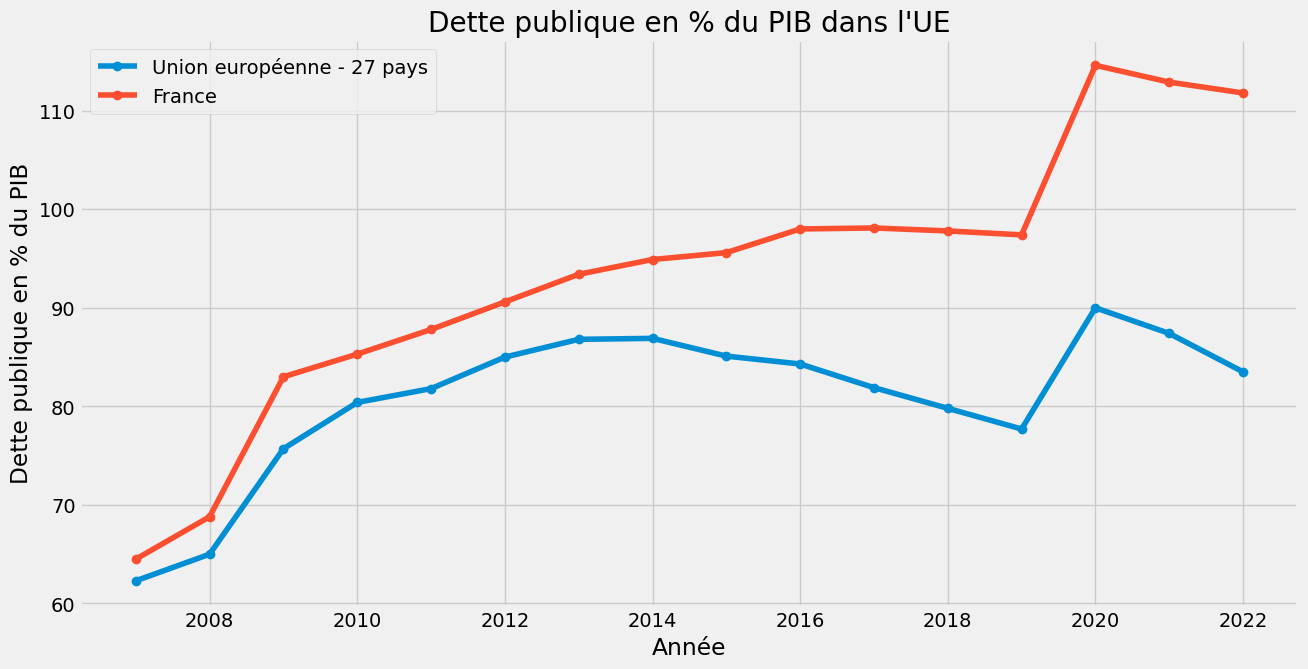

In [8]:
import matplotlib.pyplot as plt

# Raw data provided in the user's image for the new chart
data_comparison = {
    "TIME": ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007'],
    "Union européenne - 27 pays (à partir de 2020)": [83.5, 87.4, 90.0, 77.7, 79.8, 81.9, 84.3, 85.1, 86.9, 86.8, 85.0, 81.8, 80.4, 75.7, 65.0, 62.3],
    "France": [111.8, 112.9, 114.6, 97.4, 97.8, 98.1, 98.0, 95.6, 94.9, 93.4, 90.6, 87.8, 85.3, 83.0, 68.8, 64.5]
}

# Creating DataFrame
df_comparison = pd.DataFrame(data_comparison)

# Converting 'TIME' to integers for plotting purposes
df_comparison['TIME'] = df_comparison['TIME'].astype(int)
df_comparison.sort_values(by='TIME', ascending=True, inplace=True)  # Sorting by year

# Setting the style to 'fivethirtyeight' for matplotlib
plt.style.use('fivethirtyeight')

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(df_comparison['TIME'], df_comparison['Union européenne - 27 pays (à partir de 2020)'], 'o-', label='Union européenne - 27 pays')
plt.plot(df_comparison['TIME'], df_comparison['France'], 'o-', label='France')

# Adding labels and title
plt.xlabel('Année')
plt.ylabel('Dette publique en % du PIB')
plt.title('Dette publique en % du PIB dans l\'UE')
plt.legend()

# Adding the grid
plt.grid(True)

# Show the plot
plt.show()


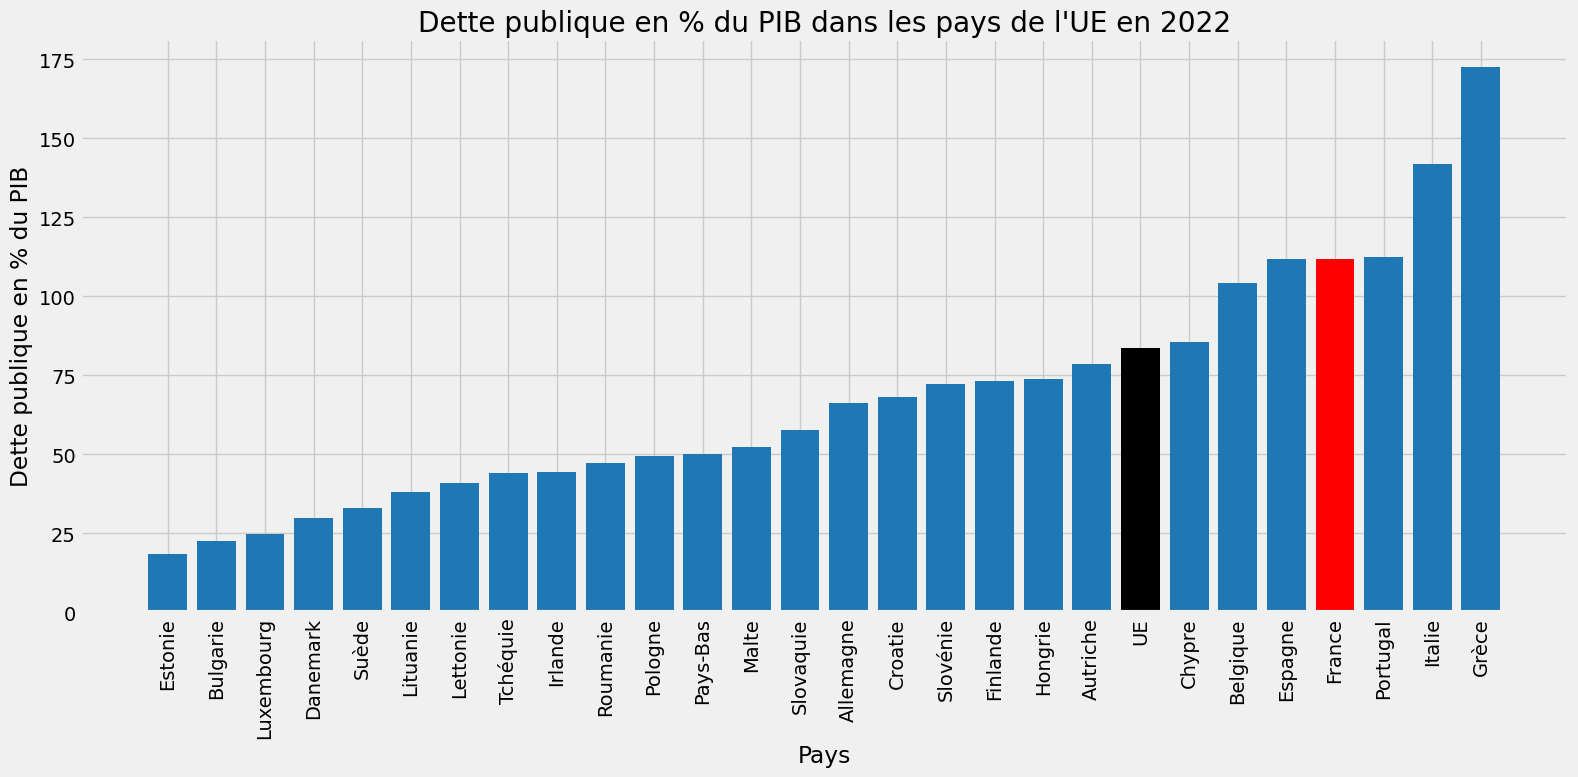

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for creating the bar chart
data = {
    "Country": [
        "Estonie", "Bulgarie", "Luxembourg", "Danemark", "Suède", "Lituanie",
        "Lettonie", "Tchéquie", "Irlande", "Roumanie", "Pologne", "Pays-Bas",
        "Malte", "Slovaquie", "Allemagne", "Croatie", "Slovénie", "Finlande",
        "Hongrie", "Autriche", "UE", "Chypre", "Belgique", "Espagne", "France",
        "Portugal", "Italie", "Grèce"
    ],
    "Debt_to_GDP": [
        18.5, 22.6, 24.7, 29.8, 32.9, 38.1, 41.0, 44.2, 44.4, 47.2, 49.3, 50.1,
        52.3, 57.8, 66.1, 68.2, 72.3, 73.3, 73.9, 78.4, 83.5, 85.6, 104.3, 111.6,
        111.8, 112.4, 141.7, 172.6
    ]
}

# Creating a DataFrame from the provided data
eu_debt_df = pd.DataFrame(data)

# Sort the DataFrame by the 'Debt_to_GDP' column in ascending order for a more logical bar chart order
eu_debt_df.sort_values(by='Debt_to_GDP', ascending=True, inplace=True)

# Create the bar chart with matplotlib
plt.figure(figsize=(16, 8))
colors = ['#1f77b4' if country not in ["France", "UE"] else ('red' if country == "France" else 'black')
          for country in eu_debt_df['Country']]

plt.bar(eu_debt_df['Country'], eu_debt_df['Debt_to_GDP'], color=colors)
plt.xlabel('Pays')
plt.ylabel('Dette publique en % du PIB')
plt.title('Dette publique en % du PIB dans les pays de l\'UE en 2022')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


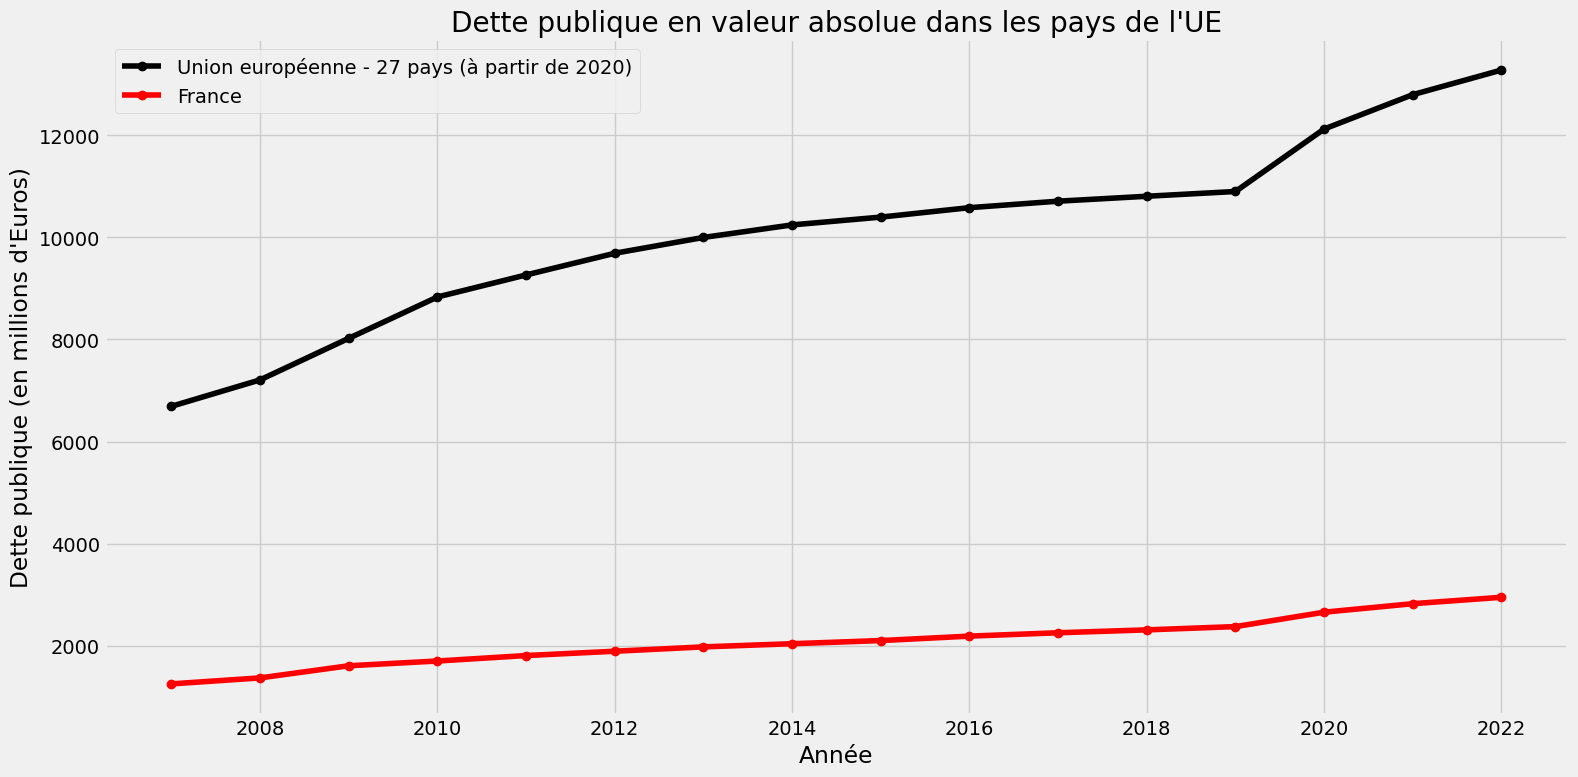

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for creating the line chart
debt_data = {
    "Time": [
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019, 2020, 2021, 2022
    ],
    "EU_27_debt": [
        6689925.5, 7207744.2, 8021735.5, 8830866.1, 9262773.0,
        9687459.4, 9997416.9, 10242855.5, 10395522.2, 10580510.4,
        10707440.5, 10803917.1, 10897340.0, 12121160.1, 12794352.4,
        13276380.3
    ],
    "France_debt": [
        1252867.0, 1370326.0, 1607983.0, 1701122.0, 1807957.0,
        1892540.0, 1977734.0, 2039884.0, 2101255.0, 2188481.0,
        2254331.0, 2310877.0, 2374942.0, 2657352.0, 2823692.0,
        2949331.0
    ]
}

# Create the DataFrame from the provided data
debt_df = pd.DataFrame(debt_data)

# Convert debt values from thousands to millions for plotting
debt_df['EU_27_debt'] /= 1000
debt_df['France_debt'] /= 1000

# Plotting the public debt in absolute values for the EU and France
plt.figure(figsize=(16, 8))
plt.plot(debt_df['Time'], debt_df['EU_27_debt'], label='Union européenne - 27 pays (à partir de 2020)', color='black', marker='o')
plt.plot(debt_df['Time'], debt_df['France_debt'], label='France', color='red', marker='o')

# Add labels and title
plt.xlabel('Année')
plt.ylabel('Dette publique (en millions d\'Euros)')
plt.title('Dette publique en valeur absolue dans les pays de l\'UE')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


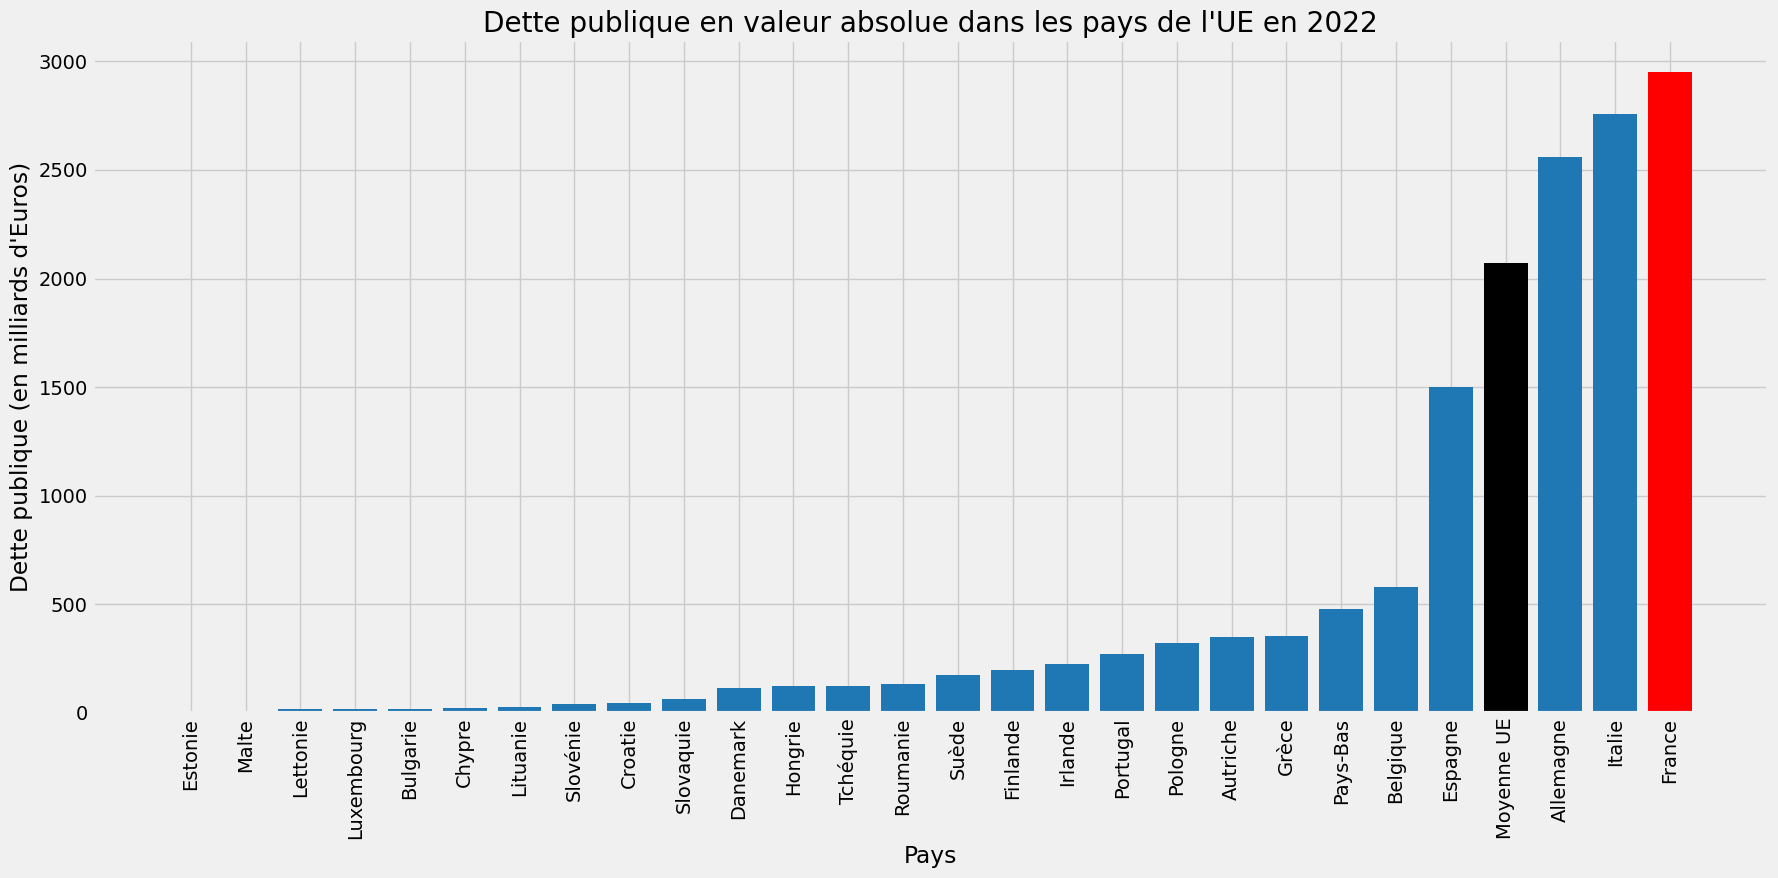

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data for the bar chart
debt_absolute_data = {
    "GEO (Libellés)": [
        "Estonie", "Malte", "Lettonie", "Luxembourg", "Bulgarie", "Chypre",
        "Lituanie", "Slovénie", "Croatie", "Slovaquie", "Danemark", "Hongrie",
        "Tchéquie", "Roumanie", "Suède", "Finlande", "Irlande", "Portugal",
        "Pologne", "Autriche", "Grèce", "Pays-Bas", "Belgique",
        "Espagne", "Moyenne UE",  "Allemagne", "Italie", "France"
    ],
    "2022": [
        6657.4, 9000.5, 15948.2, 19175.3, 19352.9, 23767.3, 25672.4, 41241.6,
        46334.0, 63378.0, 113586.0, 121820.6, 124299.8, 134469.0, 176776.5,
        196878.0, 224760.6, 272435.3, 323054.6, 350698.4, 356597.0, 480548.0,
         578063.2, 1502804.0, 2069884.2, 2561675.4, 2757547.4, 2949331.0
    ]
}

# Create the DataFrame from the provided data
debt_absolute_df = pd.DataFrame(debt_absolute_data)

# Convert debt values from thousands to millions for plotting
debt_absolute_df['2022'] /= 1000

# Define colors for the bars
colors = ['red' if country == 'France'
          else 'black' if country == 'Moyenne UE' else '#1f77b4'
          for country in debt_absolute_df['GEO (Libellés)']]

# Plotting the public debt in absolute values for the EU countries
plt.figure(figsize=(18, 9))
plt.bar(debt_absolute_df['GEO (Libellés)'], debt_absolute_df['2022'], color=colors)
plt.xlabel('Pays')
plt.ylabel('Dette publique (en milliards d\'Euros)')
plt.title('Dette publique en valeur absolue dans les pays de l\'UE en 2022')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
